In [2]:
import os
import tensorflow as tf
import sys

from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

print(physical_devices)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

print(tf.__version__)

['/device:CPU:0', '/device:XLA_CPU:0', '/device:GPU:0', '/device:XLA_GPU:0']
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device

2.3.0


### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

####
(number of samples, xpixels, ypixels, color_channel (rgb))

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

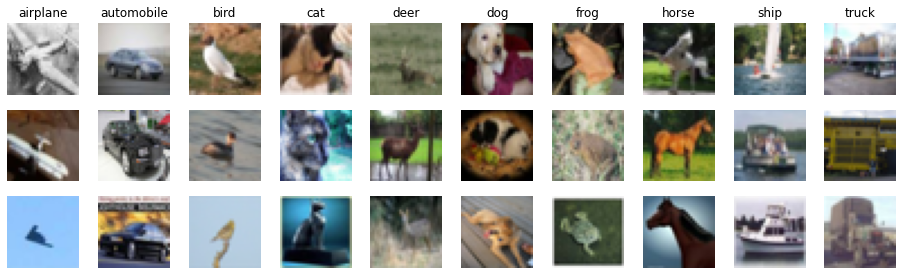

In [4]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [5]:
from tensorflow.keras.utils import to_categorical
from Custom import PlotRandomFromEachClass
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from Custom import PlotModelEval
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from Custom import PlotModelEval

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [20]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# === Add your code here ===
# Create the rest of the layers
x = Dense(60, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
# ==========================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

Model: "functional_9"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_7 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
flatten_4 (Flatten)                          (None, 3072)                            0              
____________________________________________________________________________________________________
dense_8 (Dense)                              (None, 60)                              184380         
____________________________________________________________________________________________________
dense_9 (Dense)                              (None, 10)                              610            
Total params: 184,990
Trainable params: 184,990
Non-trainable params:

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [11]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 1s 937us/step - loss: 1.4066 - accuracy: 0.4999 - val_loss: 1.5387 - val_accuracy: 0.4530
Epoch 2/15
1250/1250 [==============================] - 1s 733us/step - loss: 1.3933 - accuracy: 0.5046 - val_loss: 1.5301 - val_accuracy: 0.4619
Epoch 3/15
1250/1250 [==============================] - 1s 750us/step - loss: 1.3929 - accuracy: 0.5066 - val_loss: 1.5290 - val_accuracy: 0.4620
Epoch 4/15
1250/1250 [==============================] - 1s 750us/step - loss: 1.3792 - accuracy: 0.5078 - val_loss: 1.5265 - val_accuracy: 0.4648
Epoch 5/15
1250/1250 [==============================] - 1s 744us/step - loss: 1.3678 - accuracy: 0.5099 - val_loss: 1.5234 - val_accuracy: 0.4635
Epoch 6/15
1250/1250 [==============================] - 1s 732us/step - loss: 1.3586 - accuracy: 0.5164 - val_loss: 1.5162 - val_accuracy: 0.4712
Epoch 7/15
1250/1250 [==============================] - 1s 744us/step - loss: 1.3503 - accuracy: 0.5189 - val_loss: 1.5442 -

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [12]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.530
Test accuracy = 0.468


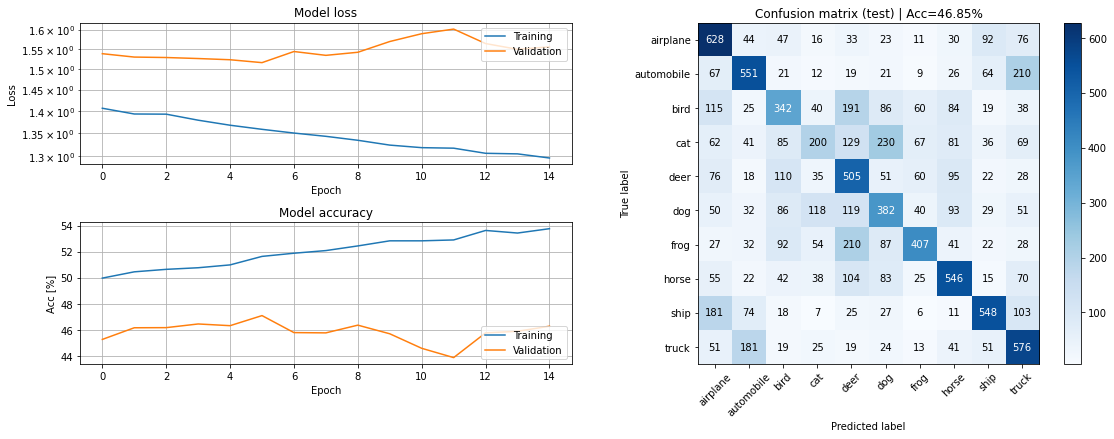

In [13]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. In the report, provide a (short) description of your model and show the evaluation image.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

####
Much more features 32x32, we have color channels this time increasing the complexity. We also have other objects that can be oriented different ways compared to handwritten digits, also the objects can be sized differently. Think about how many ways you may draw all handwritten digits compared the many different ways a car might look, from which direction the image is taken, how far away etc. The complexity increases a lot. 

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# === Add your code here ===
'''
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)

x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[2:])(x)

tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)
'''
print(x_in.shape)
x = x_in
# Block 1
x = Conv2D(16, 3, activation='relu')(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Block 2
x = Conv2D(32, 3, activation='relu')(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Block 3
x = Conv2D(64, 3, activation='relu')(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)
print(x.shape)

# Now run classification layers
x = Flatten()(x)
# Create the rest of the layers
x = Dense(200, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)

# ==========================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

(None, 32, 32, 3)
(None, 2, 2, 64)
Model: "functional_27"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_16 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_36 (Conv2D)                           (None, 30, 30, 16)                      448            
____________________________________________________________________________________________________
max_pooling2d_36 (MaxPooling2D)              (None, 15, 15, 16)                      0              
____________________________________________________________________________________________________
conv2d_37 (Conv2D)                           (None, 13, 13, 32)                      4640           
_________________________________

##### **Training the CNN**

In [49]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.6579 - accuracy: 0.3924 - val_loss: 1.3955 - val_accuracy: 0.5027
Epoch 2/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.2669 - accuracy: 0.5490 - val_loss: 1.2164 - val_accuracy: 0.5670
Epoch 3/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1291 - accuracy: 0.6006 - val_loss: 1.1010 - val_accuracy: 0.6153
Epoch 4/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0357 - accuracy: 0.6363 - val_loss: 1.1118 - val_accuracy: 0.6149
Epoch 5/15
1250/1250 [==============================] - 2s 2ms/step - loss: 0.9555 - accuracy: 0.6616 - val_loss: 1.0576 - val_accuracy: 0.6325
Epoch 6/15
1250/1250 [==============================] - 2s 2ms/step - loss: 0.8920 - accuracy: 0.6872 - val_loss: 0.9930 - val_accuracy: 0.6550
Epoch 7/15
1250/1250 [==============================] - 2s 2ms/step - loss: 0.8400 - accuracy: 0.7031 - val_loss: 1.0064 - val_accuracy:

##### **Evaluating the CNN**

In [50]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.094
Test accuracy = 0.665


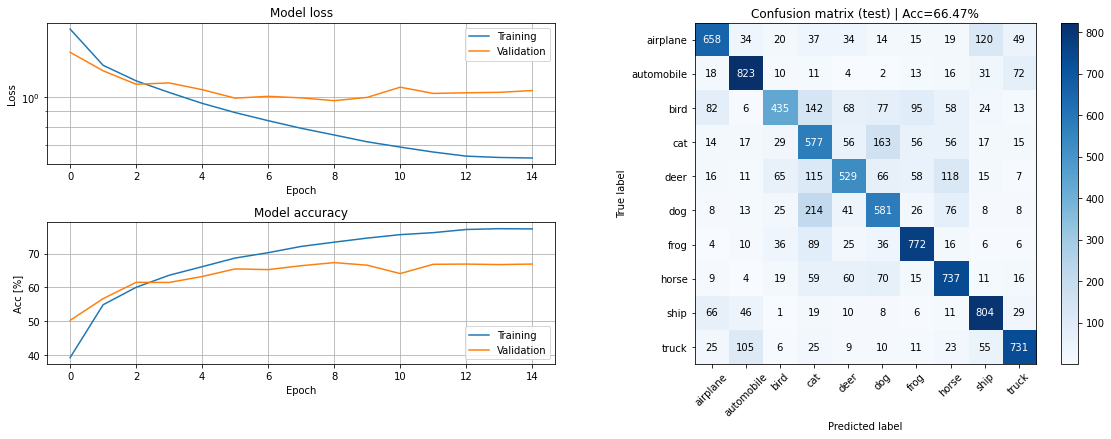

In [51]:
from Custom import PlotModelEval

PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. In the report, provide a (short) description of your model and show the evaluation image.



#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

####
Each convolution layer creates a stack of new images, all these have the same size as the original image. What happens in the convolution step is that for each pixel the convolution filter kernel strides/swipes across the image and detects how similar the kernel values are to a certain segment. This results in a new image with values close to one with a match, and negative values for non-match. This corresponds to detecting differences and similarities in the image. Then the stack of new images is run through a ReLu function making all negative values zero. From here each image in the stack are ran through a pooling window, i.e. the pooling window strides (Stride step usually the same as window size) across each image and averages the values. The pooling step is like cutting the image in different parts, which corresponds to recognizing different objects in the image, for instance eyes, mouth, eyebrows in an image of a face. It is in the pooling step that the image size decreases and thus decreases the amount of feaetures into the dense layer. Also the pooling step abstracts the parts of the image in a way that the system is less sensitive to rotation and translation of objects in an image. The layers convolution, ReLU and pooling toghether can be repeated, and are called feature learning. The final step is classification, which can be thought of as matching the components from the pooling step, eyes, mouth, eyebrows and deciding that it is a face. For each combination of layers convolution, ReLU and pooling the complexity increases and more detail is taken into account. Although it is also an abstraction, making the accuracy better, and thanks to the decreasing of features in the pooling step, the classification is faster. Then for each epoch the values in the convolution kernels are tweaked/learned.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [62]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from Custom import PlotModelEval

x_in = Input(shape=X_train.shape[1:])

# === Add your code here ===

dropOutLayer = Dropout(0.15) # 20% of the features are randomly set to zero

x = x_in
# Block 1
x = Conv2D(16, 3, activation='relu')(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)

# Block 2
x = Conv2D(32, 3, activation='relu')(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)

# Block 3
x = Conv2D(64, 3, activation='relu')(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)


# Now run classification layers
x = Flatten()(x)
# Create the rest of the layers
x = Dense(200, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
# ==========================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "functional_33"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_20 (InputLayer)            [(None, 32, 32, 3)]   0                                            
____________________________________________________________________________________________________
conv2d_57 (Conv2D)               (None, 30, 30, 16)    448         input_20[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_54 (MaxPooling2D)  (None, 15, 15, 16)    0           conv2d_57[0][0]                  
____________________________________________________________________________________________________
dropout_19 (Dropout)             multiple              0           max_pooling2d_54[0][0]           
                                                                   m

In [63]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.7426 - accuracy: 0.3527 - val_loss: 1.4531 - val_accuracy: 0.4747
Epoch 2/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.4109 - accuracy: 0.4888 - val_loss: 1.2574 - val_accuracy: 0.5486
Epoch 3/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.2966 - accuracy: 0.5356 - val_loss: 1.2550 - val_accuracy: 0.5426
Epoch 4/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.2117 - accuracy: 0.5666 - val_loss: 1.1070 - val_accuracy: 0.6022
Epoch 5/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1611 - accuracy: 0.5854 - val_loss: 1.1244 - val_accuracy: 0.6055
Epoch 6/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1209 - accuracy: 0.6019 - val_loss: 1.0767 - val_accuracy: 0.6200
Epoch 7/15
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0920 - accuracy: 0.6132 - val_loss: 1.0050 - val_accuracy:

In [64]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.924
Test accuracy = 0.678


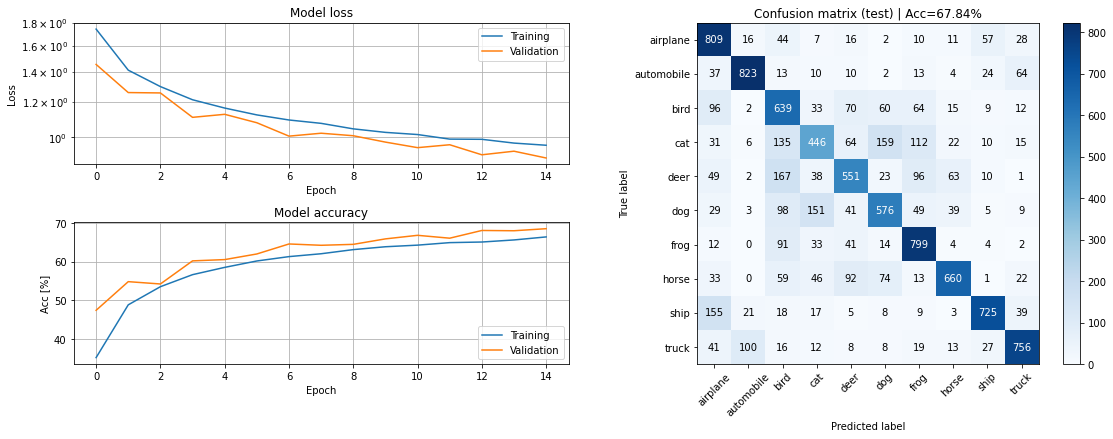

In [65]:
from Custom import PlotModelEval
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Train the modified CNN-model. Save the evaluation image for the report.

#### **<span style="color:red">Question 7:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

####
Lower accuracy overall but training, validation and test accuracy are more similair. Dropout layer does nothing at test time only at training stage. 

Hint: what does the dropout layer do at test time?

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [58]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# === Add your code here ===
dropOutLayer = Dropout(0.15) # 20% of the features are randomly set to zero

# Blocks now on the form: [conv-batchnorm-activation-pooling-dropout]

x = x_in
# Block 1
x = Conv2D(16, 3, activation=None)(x)
x = BatchNormalization(momentum=0.75)(x)
x = Activation("relu")(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)

# Block 2
x = Conv2D(32, 3, activation=None)(x)
x = BatchNormalization(momentum=0.75)(x)
x = Activation("relu")(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)

# Block 3
x = Conv2D(64, 3, activation=None)(x)
x = BatchNormalization(momentum=0.75)(x)
x = Activation("relu")(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)


# Now run classification layers
x = Flatten()(x)
# Create the rest of the layers
x = Dense(200, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
# ==========================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "functional_31"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_19 (InputLayer)            [(None, 32, 32, 3)]   0                                            
____________________________________________________________________________________________________
conv2d_54 (Conv2D)               (None, 30, 30, 16)    448         input_19[0][0]                   
____________________________________________________________________________________________________
batch_normalization_48 (BatchNor (None, 30, 30, 16)    64          conv2d_54[0][0]                  
____________________________________________________________________________________________________
activation_48 (Activation)       (None, 30, 30, 16)    0           batch_normalization_48[0][0]     
____________________________________________________________________

In [59]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5757 - accuracy: 0.4240 - val_loss: 1.3414 - val_accuracy: 0.5140
Epoch 2/50
1250/1250 [==============================] - 2s 2ms/step - loss: 1.3022 - accuracy: 0.5347 - val_loss: 1.1746 - val_accuracy: 0.5849
Epoch 3/50
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1805 - accuracy: 0.5838 - val_loss: 1.1463 - val_accuracy: 0.5862
Epoch 4/50
1250/1250 [==============================] - 2s 2ms/step - loss: 1.1022 - accuracy: 0.6089 - val_loss: 1.1301 - val_accuracy: 0.5985
Epoch 5/50
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0578 - accuracy: 0.6280 - val_loss: 0.9891 - val_accuracy: 0.6488
Epoch 6/50
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0106 - accuracy: 0.6436 - val_loss: 0.9382 - val_accuracy: 0.6691
Epoch 7/50
1250/1250 [==============================] - 2s 2ms/step - loss: 0.9838 - accuracy: 0.6539 - val_loss: 0.8775 - val_accuracy:

In [60]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.740
Test accuracy = 0.752


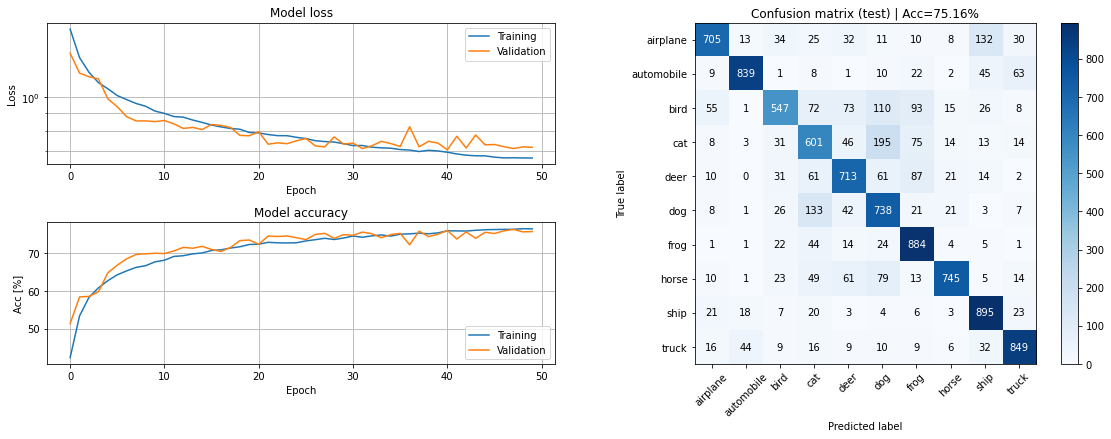

In [61]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Train the model and save the evaluation image for the report.

#### **<span style="color:red">Question 9:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if the wrong minibatch size is used.

####
The hint is that if the momentum term is small we adapt fast to changes, but can lead to instability if the minibatch size is not representative of the entire data set. In other words this should mean that a too small minibatch size will be sensitive to deviations in the data, if it is larger the average of the mini batch size should represent the entire data set better. 

(
I think what occures is that if the minibatch is too small we adapt fast to errors during the training, the problem is that each layer adapts simultaneosly, which leads to instability if layers adapt too much at the same time. If the minibatch size is too large the convergence will just take longer, but the changes in each layer is slow enough in order for error compensation not being to large in each direction. 
)

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "functional_35"
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_21 (InputLayer)            [(None, 32, 32, 3)]   0                                            
____________________________________________________________________________________________________
conv2d_60 (Conv2D)               (None, 30, 30, 64)    1792        input_21[0][0]                   
____________________________________________________________________________________________________
batch_normalization_51 (BatchNor (None, 30, 30, 64)    256         conv2d_60[0][0]                  
____________________________________________________________________________________________________
activation_51 (Activation)       (None, 30, 30, 64)    0           batch_normalization_51[0][0]     
____________________________________________________________________

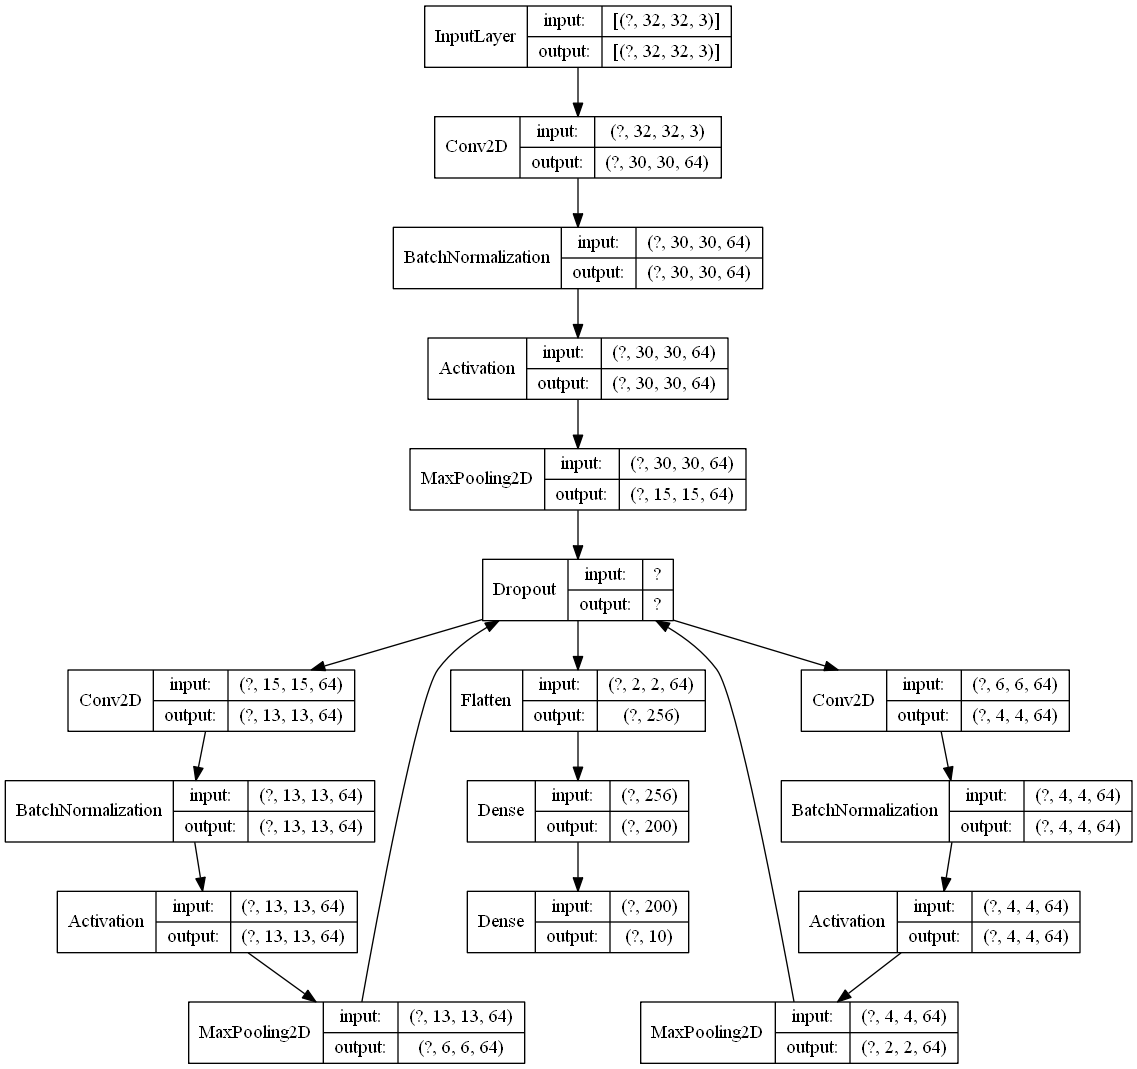

In [66]:
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# === Add your code here ===
dropOutLayer = Dropout(0.2) # 20% of the features are randomly set to zero

# Blocks now on the form: [conv-batchnorm-activation-pooling-dropout]

x = x_in
# Block 1
x = Conv2D(64, 3, activation=None)(x)
x = BatchNormalization(momentum=0.9)(x)
x = Activation("relu")(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)

# Block 2
x = Conv2D(64, 3, activation=None)(x)
x = BatchNormalization(momentum=0.9)(x)
x = Activation("relu")(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)

# Block 3
x = Conv2D(64, 3, activation=None)(x)
x = BatchNormalization(momentum=0.9)(x)
x = Activation("relu")(x)
maxPool = MaxPooling2D(pool_size=(2, 2), padding='valid')
x = maxPool(x)

# Perform a dropout after each pooling in convolution part as suggested
x = dropOutLayer(x)


# Now run classification layers
x = Flatten()(x)
# Create the rest of the layers
x = Dense(200, activation='tanh')(x)
x = Dense(10, activation='softmax')(x)
# ==========================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [67]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5196 - accuracy: 0.4502 - val_loss: 1.5382 - val_accuracy: 0.4541
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.2336 - accuracy: 0.5573 - val_loss: 1.5277 - val_accuracy: 0.4945
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1159 - accuracy: 0.6038 - val_loss: 1.3263 - val_accuracy: 0.5422
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0322 - accuracy: 0.6336 - val_loss: 1.4652 - val_accuracy: 0.5120
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9753 - accuracy: 0.6564 - val_loss: 0.9966 - val_accuracy: 0.6460
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.9274 - accuracy: 0.6734 - val_loss: 0.8896 - val_accuracy: 0.6828
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8958 - accuracy: 0.6860 - val_loss: 0.8837 - val_accuracy:

In [68]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.665
Test accuracy = 0.770


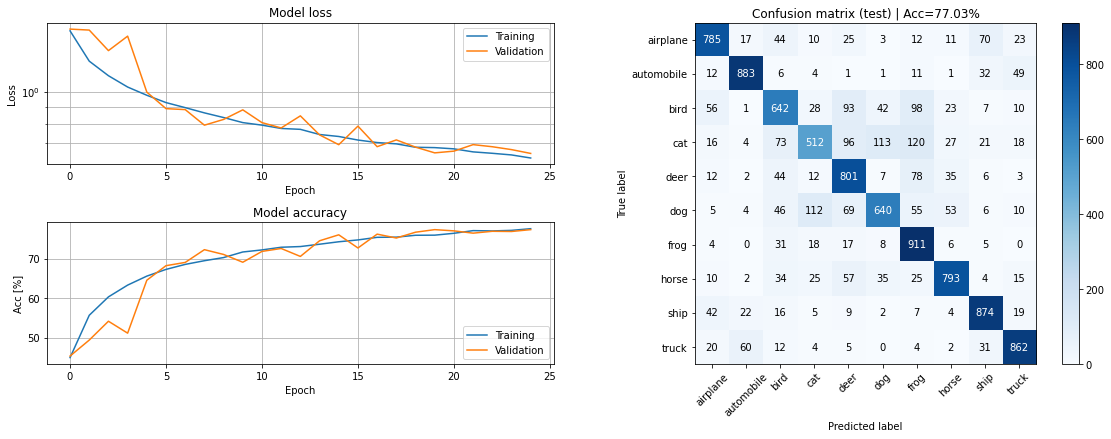

In [69]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 10:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Save the evaluation image for the report. Also, in the report you should explain your model and motivate the design choices you have made.

####
Based the model on previous generated model. Then increased the momentum in batch normalization layer to get a more stable but slower convergence, thus the validation error in the end does not deviate as much from the training error. In the convolutional error I increased the stack size to 64 for all blocks to get more filterkernels trying to find more edges in the original image and also for the deeper layers more edges in the pooled images, in total this finds more detail and at the same time more abstraction from the pooling. I set the dropout rate to 20% which made the validation error follow the training error nicely.

### **Want some extra challenge?**
For those of you that feel the competitive spark right now, we will hold an **optional** competition where you can submit your trained model-file for evaluation. To make this fair, you are not allowed to train for more than **50 epochs**, but other than that we want you to get creative. The competition is simple, we will evaluate all submitted models and the model with highest test accuracy wins. The prize is nothing less than eternal glory.

Here are some things to look into, but note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

Write your competition model here. This way you can try different things without deleting the model you created above. Also set the GroupName variable to your LiU IDs or some unique name; that way our scripts can be a lot easier, thanks and good luck :)

In [ ]:
GroupName = "Test"

x_in = Input(shape=X_train.shape[1:])

# Your code here

model = Model(inputs=x_in, outputs=x, name=GroupName)

# You can also change this if you want
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

**Don't forget to save your model!**

In [ ]:
model.save("CompetionModel_" + GroupName + ".h5")